In [18]:
# import
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import geopandas as gpd
import geodatasets
from shapely.geometry import Point
import zipfile
import os
import folium
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
# load dataset
earthquakes = pd.read_csv('earthquake_merged2.csv')
eq = earthquakes.dropna(subset=['Latitude', 'Longitude'])

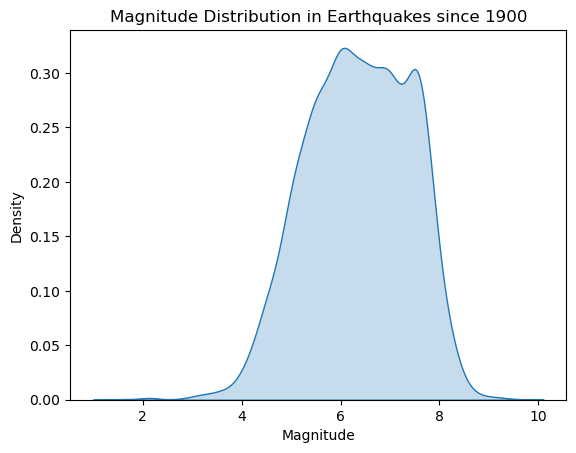

In [3]:
import seaborn as sns
sns.kdeplot(eq['Mag'], bw_adjust = 1, fill = True)
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.title('Magnitude Distribution in Earthquakes since 1900')
plt.show()

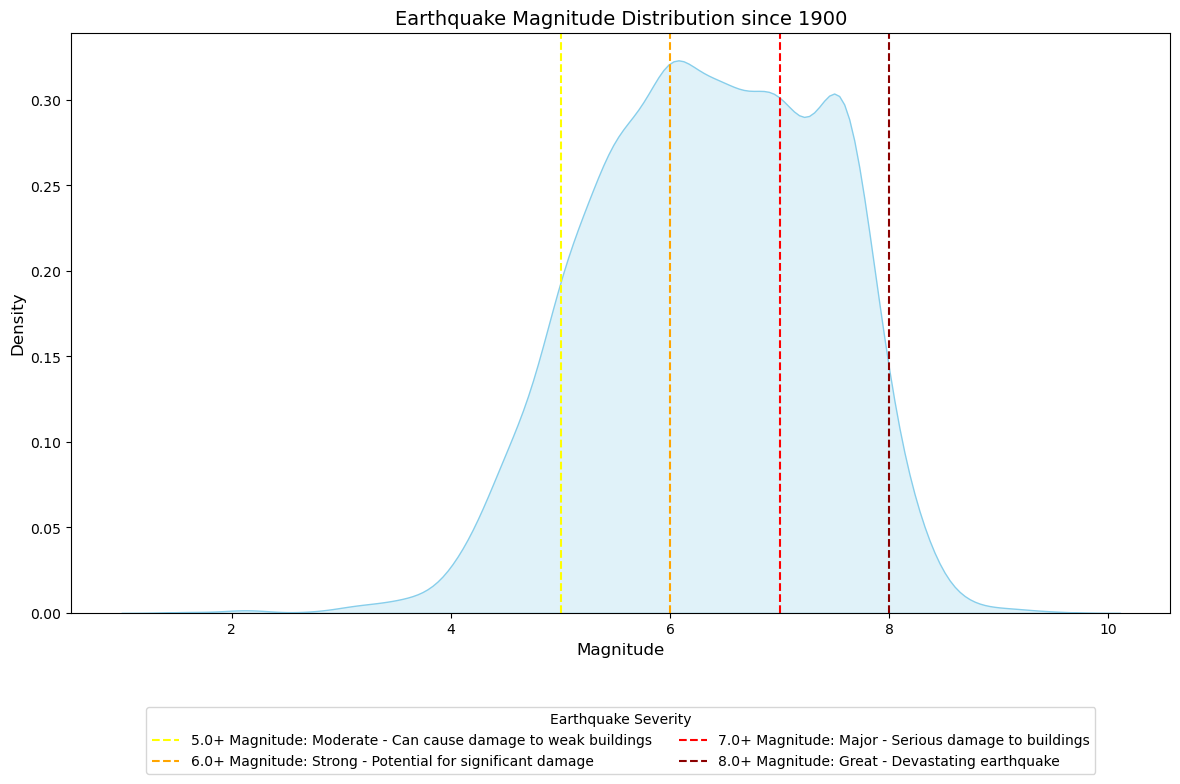

In [26]:
plt.figure(figsize=(12, 8))

# Create the KDE plot
sns.kdeplot(eq['Mag'], bw_adjust=1, fill=True, color='skyblue')

# Add vertical lines for earthquake severity
severity_levels = [
    (5.0, 'Moderate - Can cause damage to weak buildings'),
    (6.0, 'Strong - Potential for significant damage'),
    (7.0, 'Major - Serious damage to buildings'),
    (8.0, 'Great - Devastating earthquake')
]

colors = ['yellow', 'orange', 'red', 'darkred']

for (magnitude, description), color in zip(severity_levels, colors):
    plt.axvline(x=magnitude, color=color, linestyle='--', 
                label=f'{magnitude}+ Magnitude: {description}')

plt.xlabel('Magnitude', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Earthquake Magnitude Distribution since 1900', fontsize=14)
plt.legend(title='Earthquake Severity', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol = 2)

plt.tight_layout()
plt.show()

The graph above represents density plot of the distribution of earthquake magnitudes, which we used to explore the severity of earthquakes. The graph shows that earthquake magnitudes have a slightly bimodal distribution, with peaks around 6.0 and 8.0. In addition, the distribution is relatively narrow, with very little earthquakes being exceptionally low or high in magnitude, so we can deduce that the kurtosis is quite high. Finally, there are vertical lines show where certain magnitudes are and the potential damage they can cause. They are color coded based on the level of magnitude.

In [10]:
# interactive plot 1
eq_gdf = gpd.GeoDataFrame(
    eq, 
    geometry=gpd.points_from_xy(eq['Longitude'], eq['Latitude'])
)

eq_gdf['Total Deaths'] = eq_gdf['Total Deaths'].apply(lambda x: int(x) if pd.notnull(x) and x != 0 else 'N/A')
eq_gdf['Total Deaths'] = eq_gdf['Total Deaths'].fillna('N/A').astype(str)

# Create a folium map centered at an average location
center_lat, center_lon = eq_gdf['Latitude'].mean(), eq_gdf['Longitude'].mean()
earthquake_map = folium.Map(
    location=[center_lat, center_lon], 
    zoom_start=2,
    tiles='https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}{r}.png',
    attr='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
    name='CartoDB Positron'
)

chart = eq_gdf.explore(
    column='Mag',
    m=earthquake_map,  # Pass your existing map here
    cmap='viridis',  # Optional: color mapping based on magnitude
    tooltip=['Year', 'Mag', 'Total Deaths']
)

chart.save("map final.html")

This is an interactive plot of every earthquake in the dataset. To interact with the graph, users can use their cursor to move between countries and areas within the world. The user can hover over each dot, which represent an occurrence of an earthquake, to show the year the earthquake occurred, the magnitude of the earthquake, and any recorded deaths. In addition, each dot is color coded based on magnitude. This map shows us where earthquakes are most prevalent around the world, like the eastern side of Africa, the Ring of Fire, and southern China.  

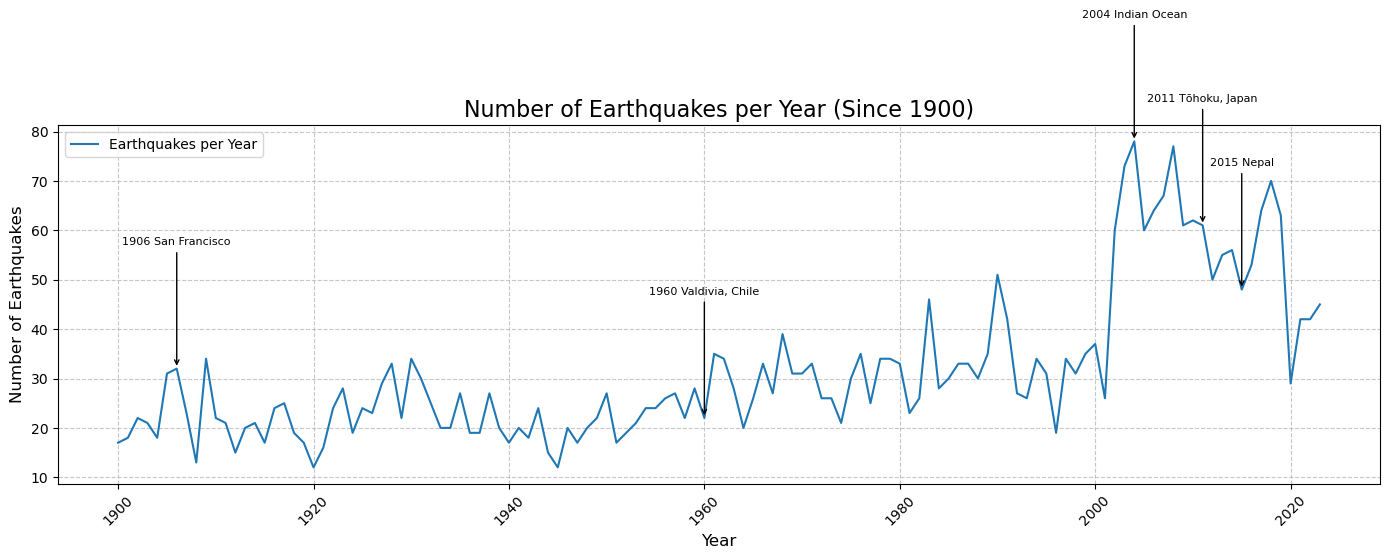

In [33]:
# Group earthquakes by year and count
earthquakes_per_year = eq[(eq['Year'] >= 1900) & (eq['Year'] < 2024)].groupby('Year').size().reset_index(name='Number of Earthquakes')

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(earthquakes_per_year['Year'], earthquakes_per_year['Number of Earthquakes'], label='Earthquakes per Year')

# Famous earthquakes
famous_quakes = [
    (1906, "1906 San Francisco"),
    (1960, "1960 Valdivia, Chile"),
    (2004, "2004 Indian Ocean"),
    (2011, "2011 Tōhoku, Japan"),
    (2015, "2015 Nepal")
]

# Annotate famous earthquakes
for year, description in famous_quakes:
    count = earthquakes_per_year.loc[earthquakes_per_year['Year'] == year, 'Number of Earthquakes'].values
    if len(count) > 0:  # Ensure the year exists in the data
        plt.annotate(
            description,
            xy=(year, count[0]),
            xytext=(year, count[0] + 25),  # Adjust y-offset for visibility
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=8,
            ha='center'
        )

# Customize the plot
plt.title('Number of Earthquakes per Year (Since 1900)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

This is a time series plot of earthquake existences since 1900. The occurences of earthquakes appear to be cyclical from 1900 to 2000, which makes sense given the earthquake cycle, which is the phenomeon explaining that earthquakes exist on the same faults repeatedly due to the build up of stress. Around 2000, we see a large jump in earthquake occurrences. This is likely due to the fact that technology to record earthquakes has improved, as smaller earthquakes and earthquakes occurring deeper in the Earth can be recorded. Because of this, we have decided to concentrate our visualizations on this portion of the dataset, since the quality of data is much higher. We have also included arrows to point out when famous earthquakes have occured.